<br>
<br>
 <center> <font size = "5"> Data Science Research Methods</font></center>
 <br>
 <center> <font size = "4"> Coursework Assignment 1</font></center>
 <br>
 <center> <font size = "3"> CandNo: 214331</font></center>
<br>



---



### 1. Overview






In the context of this assignment we had to assume the role of a data scientist at Sussex-Budget-Productions. The company is at a really critical position as the latest movie that they produced, a comedy-action-thriller, with a budget of 500k grossed only 50k. Our CEO thinks that we can persuade investors to part with 1.5 million over the next year but needs to ensure a good return. As a data scientist of the company I have been assigned to the task of analysing the data in IMDB and come up with an actionable plan. Along this notebook I have provided my train of thought regarding the conducted exploratory data analysis as well as my hypotheses and the experiments that I carried out to test whether they were supported by the provided dataset.
<br>
<br>
### 2. Introduction
<br>
In this report I am going to present my approach for analysing the IMBD dataset concluding to some proposed actions that will ensure a good return to our new production. Specifically, I will focus on the exploratory data analysis as well as my hypotheses design process and the corresponding experiments that were carried out in order to test them and confirm or reject my initial assumptions.
<br>

<br>
In the first part of my Analysis section I will explain how I imported and did my initial exploration with the provided dataset in order to select the data that were useful for the task. Subsequently I will go through some of the most basic iterative steps of the data science process such as data munging, data cleaning, exploratory data analysis and data visualisation in order to get useful insights and come up with some conclusions. In order to enhance my proposed plan, I will describe my hypothesis design process as well as the experiments that I carried out to test the validity of my hypothesis.

<br>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/525px-Data_visualization_process_v1.png'/>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$<font size="2">           Figure 1 The Data Science Process (https://www.kdnuggets.com/2016/03/data-science-process.html) [1]</font>
<br>

<br>


Finally, the last step after the Analysis section is the presentation of the final results and the design of an actionable plan based on my findings. This part will be presented at the Results Section where I will include my results interpretation and the basic proposed actions that will help our company to guarantee a profitable production.
<br>



### 3. Analysis

In this section I will describe the basic steps that I followed in order to conduct my data analysis including the corresponding code-bits and graphs. Specifically, I will start by importing and exploring the dataset in order to understand which data are useful for my task. Subsequently, I will proceed to the data munging and data cleaning in order to get my data ready for the Exploratory data analysis. Finally, after getting the insights from this process, I will also design some hypothesis as well the corresponding experiments to test their validity.
<br>

### 3.1 Import and Explore the Dataset

The first step of the analysis process was to import my data and explore the dataset. Through this process I got an initial idea of my data and helped me to understand which of them would be useful for my analysis.
Specifically, I found that the dataset has 28 different categories of data (columns) including the director name, duration of the film, gross, budget etc. collected from 5043 different movies (rows). I also explored the data type of each column in order to know what type of operations I could do with each one.
<br>
<br>
The Final step was to explore what is happening with the missing values of our dataset, which is also another important factor when we are selecting the data that we will focus our analysis. For example, since gross and budget have too many missing values, and we wanted to keep these two variables for the following analysis, we could only delete rows with null values for gross and budget because imputation would not work effectively the specific case.
<br>
<br>


##### Code for the initial data exploration

In [1]:
# Importing the data into a panda dataframe

import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile="movie_metadata.csv" # file name to import
DataMovies=pd.read_csv(myfile) #import the data and save them in a panda dataframe called "df"


#  Check the number of rows and columns as well as the data type of each column

# check the number of rows and columns
# DataMovies.shape
# check the data type of each column
# DataMovies.dtypes


#  Check the missing values of each column

# DataMovies.info() 
# DataMovies.isnull().sum()


# Select the format to display our dataframe
pd.set_option('display.float_format', lambda x: '%.5f' % x)

<br>
After this step, we had got an initial understanding of our dataset and we were in a position to select some of the data that they would be useful for our analysis. We decided to work with columns such as genres, country, title year, budget, gross and imdb score. During our analysis we had to keep in mind our basic limitation which was the available budget for this new production (1.5 million) as well as the aim of our analysis which was to propose recommendations in order to come up with an actionable plan.
<br>
<br>

### 3.2 General Analysis of our dataset - Data Selection - Data Cleaning

This part of the analysis was focused on the data selection (select specific columns of the initial dataset and construct a new dataframe with the desired data), data cleaning (handle missing values of the new dataset) and general analysis some of the numerical values. The first step was to select the desired columns of the initial dataframe and construct a new one including only the columns that we wanted to focus our analysis. We decided to select 9 out of 28 columns of the initial dataset that we considered as most important for the purpose of our analysis.
<br>
<br>
Another important thing that was also done during this step was to add an extra column that would include the information about the profit of each movie. In order to do this, we implemented the calculate-profit function which finds the profit by subtracting the budget from the gross of each movie. The main reason for creating this extra column was the aim of our task (persuade investors to part with 1.5 million to our new production) and its correlation with the 'profit' concept.
<br>
<br>
The last step was to handle the missing values of the dataset. As we also stated in the previous section we decided to drop the columns that contained 'NaN' values as we would still have sufficient data to conduct our analysis.
<br>
<br>
After having organised and cleaned our dataset we decided to have a look at the distribution of some numerical values and start planning our main analysis which will be presented below. In order to do this, we used the seaborn, a data visualisation library.
<br>
<br>


##### Code for the data selection-data cleaning and general analysis of the  numerical values

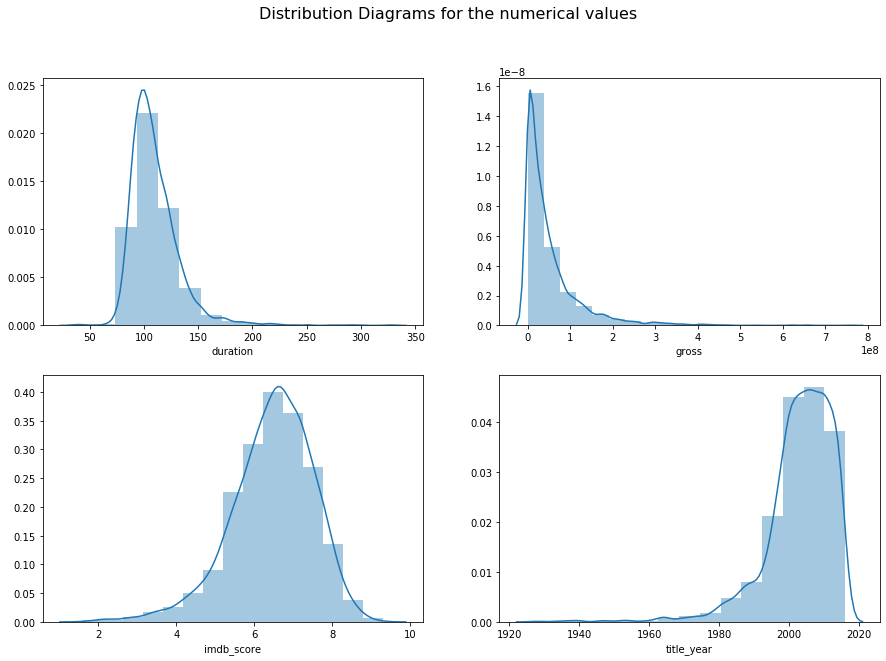

In [2]:
# make dataframe with the selected columns of the initial dataset
DataMovies_selected=DataMovies.loc[:,['duration','genres','language','country','title_year','imdb_score','gross','budget']]



# Find the mean profit for each movie. In order to calculate the profit we will subtract the mean budget
# from the mean gross. Finally we will add an extra column to our dataframe for the profit values.
calculate_profit = lambda row: row.gross - row.budget # define a function for the new column
col = DataMovies_selected.apply(calculate_profit, axis=1) # get column data with an index
DataMovies_selected = DataMovies_selected.assign(profit=col.values) # assign values to column 'c'



# Delete the rows which include missing values
DataMovies_selected = DataMovies_selected.dropna()
DataMovies_selected = DataMovies_selected.reset_index(drop=True)


# Using the seaborn library to produce the distribution diagrams of the duration, gross, imdb score and title year

import seaborn as sns 

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 10)

fig.suptitle('Distribution Diagrams for the numerical values', fontsize=16)

m1 = sns.distplot(DataMovies_selected.duration, bins=15, ax=axes[0, 0])
m2 = sns.distplot(DataMovies_selected.gross, bins=20, ax=axes[0, 1])
m3 = sns.distplot(DataMovies_selected.imdb_score, bins=15, ax=axes[1, 0])
m4 = sns.distplot(DataMovies_selected.title_year, bins=15, ax=axes[1, 1])





<br>
<br>
Looking at the distribution diagrams we can conclude to some general observations regarding the duration, gross, imdb score and title year of the movies. Specifically we found that:

- Duration: A large number of movies have a duration between ≈100 - 120 minutes.
- Gross: The majority of the movies have a gross between 0 and 100 million dollars.
- IMDB score: Most of the imdb scores are between 6/10 and 7/10.
- Title Year: The majority of the movies within the dataset have been produced after 1990.

<br>
<br>

Although the information from the diagram is general, they helped us to understand the distribution of our numerical values and organise our strategic plan for our analysis. Specifically, we decided to take into account the movies that they were produced after 2000. The reason for this decision was that the trends change through the years and we should be based on the most updated data. Looking at the title year distribution diagram, we also observed that the majority of the movies have been produced after 2000 which means that they would be sufficient amount of data to use in our analysis.
<br>
<br>
Another important factor that we had also to take into account was our maximum budget. According to our task overview, the funding of our production would not exceed the 1.5 million. However, if we narrow down our data only to the movies that they have been produced with <= 1.5 million we would see that there are not enough data to produce accurate results. For this reason, we decided to conduct our analysis only on "low-budget production movies" that they have a budget <= 5 million. The "low-budget production movies" category and the limit of 5 million was a compromise that we set in order to have a sufficient amount of data and at the same time focus on low budget productions as ours. The next steps of our analysis were focused on exploring specific aspects of the dataset that helped us to come up with our final plan.
<br>
<br>

    

### 3.3 Country Analysis

The first step of our analysis was to select in which country we would produce our movie. For this reason we decided to initialise a new dataframe which would hold all the appropriate information such as the country name, budget, gross and profit of each movie. Subsequently we decided to calculate the mean budget, gross and profit for each country independedly and plot the average budget of each country. 
<br>
<br>

##### Code for the Country Analysis

In [3]:
# make a new dataframe with the data for the Country analysis

country=DataMovies_selected.loc[:,['country','budget','gross','profit']]

country = country.reset_index(drop=True)


# get mean budget, gross and profit by genre
country_final = country.groupby('country', as_index=False)['budget','gross','profit'].mean()


# add an extra column that will hold info regarding with the number of movies at each country
country_final['counts'] = country_final['country'].map(country["country"].value_counts())

# sort the dataframe according to the mean budget values
country_final = country_final.sort_values(by='budget',ascending=False)




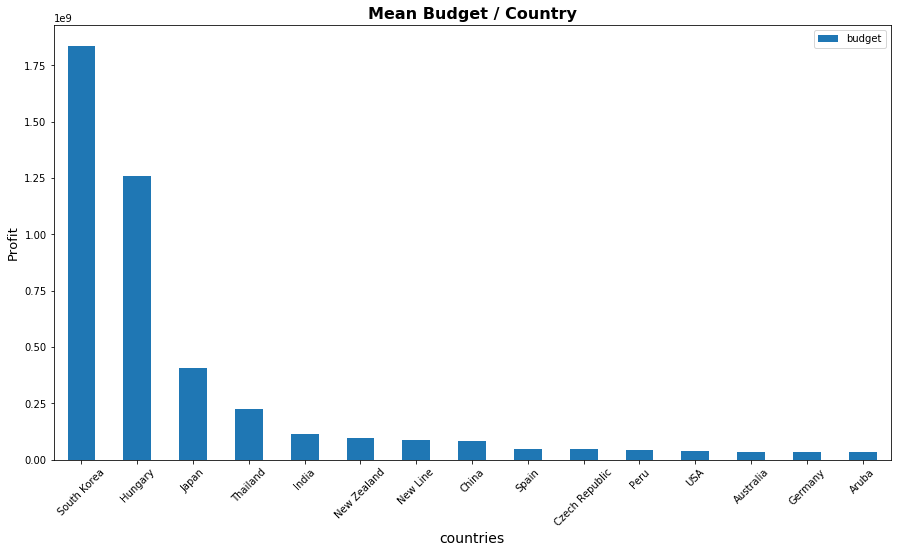

In [4]:
#Plot the 7 countries with the highest mean budget 
country_final[0:15].plot(kind='bar',x='country',y='budget',figsize=(15,8),rot= 45)
plt.title('Mean Budget / Country', fontsize=16,fontweight='bold')
plt.xlabel('countries',fontsize=14)
plt.ylabel('Profit',fontsize=13)
plt.show()

<br>
Looking at the Mean Budget / Country diagram we observed an unexpected result. Countries such as South Korea, Hungary or Thailand had a much higher mean average budget than USA or UK (which are two of the most well - known countries in the filming production area). After doing some research we found out that the main reason for that was that our dataset used a different currency for each country. Specifically, we found out that 1 won Korean is equal to 0.00086 USD, 1 Hungarian Forint is equal to 0.0033 USD and 1 Yen is equal to 0.0092 USD. This observation made us understand than the produced diagram was reasonable and that the actual reason that countries such as South Korea, Hungary and Japan were considered to have the highest budget across the other countries was the inconsistent currency system of our dataset. The next step was to plot a frequency diagram of movies at each country and observe its distribution in order to decide how to tackle this problem.
<br>
<br>


##### Code for the Plotting the frequency of movies at each country

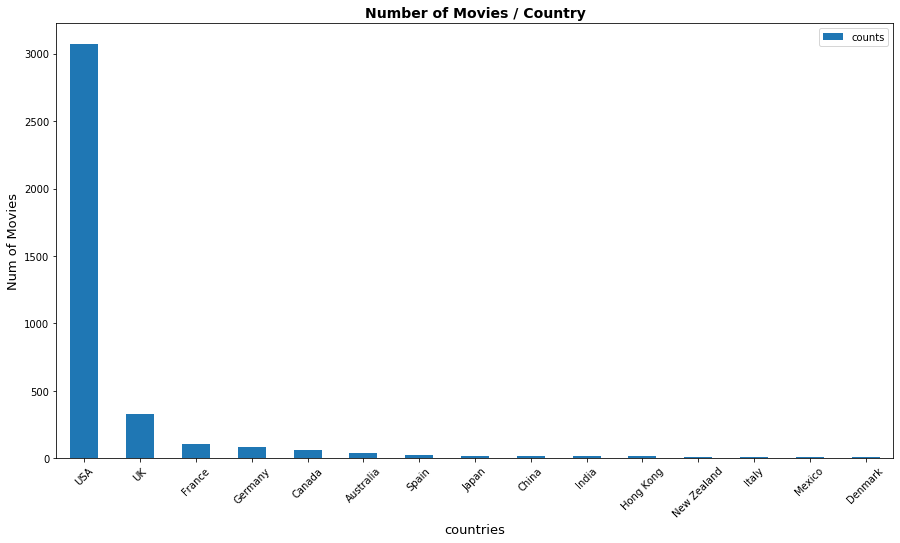

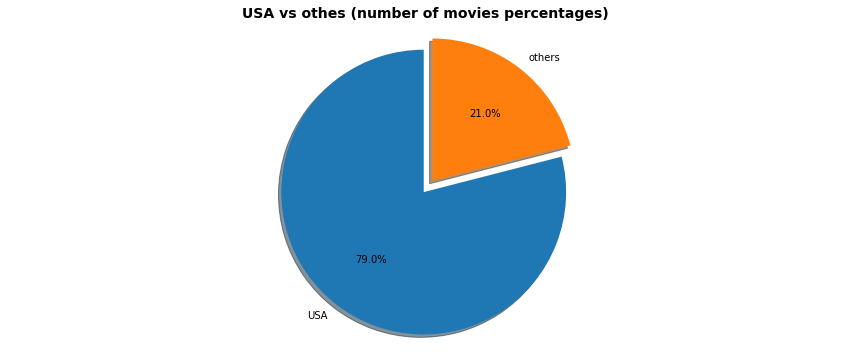

In [5]:
#Plot the top 7 most profitable movie genres within our budget 
country_final = country_final.sort_values(by='counts',ascending=False)
country_final[0:15].plot(kind='bar',x='country',y='counts',figsize=(15,8),rot= 45)
plt.title('Number of Movies / Country', fontsize=14,fontweight='bold')
plt.xlabel('countries',fontsize=13)
plt.ylabel('Num of Movies',fontsize=13)
plt.show()


all_films = country_final['counts'].sum()
USA_films = country_final[country_final['country'] == 'USA']['counts']

# Calculate the percantage of USA movies
USA_percentage = USA_films / all_films * 100
USA_percentage_df= USA_percentage.to_frame()
USA = USA_percentage_df.iloc[0]['counts']
others = 100 - USA

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'USA', 'others'
sizes = [USA, others]
explode = (0.1, 0.0) 

fig1, ax1 = plt.subplots()
fig1.set_size_inches(15, 6)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('USA vs othes (number of movies percentages)', fontsize=14,fontweight='bold')
plt.show()




<br>
<br>
According to the produced diagram above, we can clearly see that the majority of movies (≈ 80%) have been produced in USA. For this reason in terms of this analysis and the provided dataset we decided to select USA as the country that we will conduct our investigation. The main two reasons for this decision were:

- The majority of the movies in our dataset have been produced in USA
<br>
<br>
- By selecting only the USA movies we overcome the problem with the inconsistent currency in the dataset as all the movies in USA are in USD dollars.
<br>
<br>






### 3.4 Genre Analysis

In this section we will go through the steps we followed in order to find which genre of movie is the best option for the Sussex Budget Productions. Taking into account the limitations stated in the previous section we started our investigation by selecting the movies that were within the target budget (5 million), they have been released after 2000 and they have also been produced in USA. As the aim of our task was to convince our investors to take part in the production we should focus on the aspect of how profitable each genre is. 
<br>
<br>
The first step of the genre analysis was to select the data that we were interested in, which were the genres, the budget, the gross and the profit of each movie. Looking at the dataset, we found out that each movie may had more than one genres. However, with this structure of the dataframe, we were unable to analyse each genre separately. In order to overcome this problem, we implemented the explode method which unnests the genres column of our dataframe. Using this method, we managed to unnest the genres column and calculate the mean budget, gross and profit of each genre separately. Subsequently, we sorted the genres by their mean profit in a descending order and we plotted the 7 most profitable of them.
<br>
<br>


##### Code for the Genre Analysis

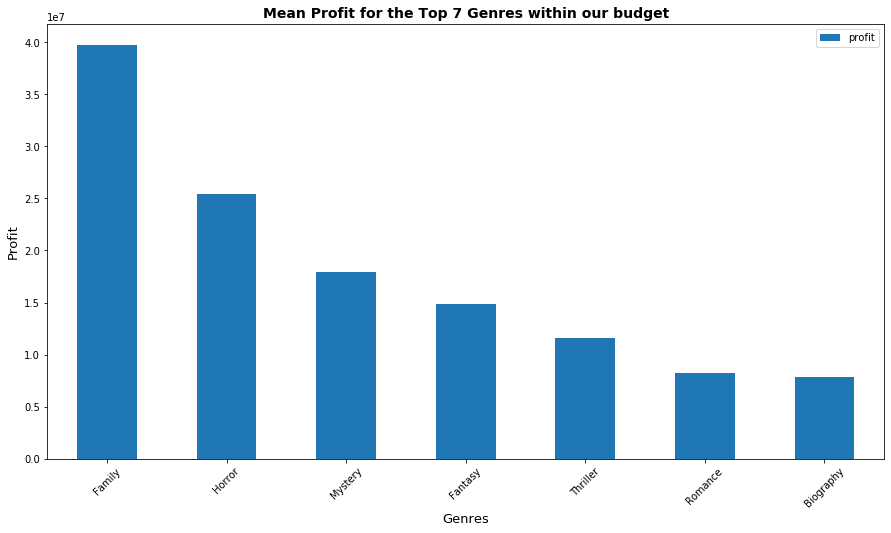

In [6]:
# Select the movies that they satisfy our requirements
# 1- Have a budget <= 5 M
# 2- Title year >= 2000
# 3- Country = USA

target_budget = 5000000

DataMovies_selected_N = DataMovies_selected[(DataMovies_selected['title_year']>=2000) & (DataMovies_selected['budget']<=target_budget) & (DataMovies_selected['country']=='USA')]


# make a new dataframe with the data of interest for the Genre analysis

genre_analysis_data=DataMovies_selected_N.loc[:,['genres','budget','gross','profit']]

genre_analysis_data = genre_analysis_data.reset_index(drop=True)


# explode the genre column of our dataframe

def explode(dataframe,column):
    
    """Explodes (unnests) a column of a dataframe.

    Parameters
    ----------
    dataframe : a pandas dataframe object
    
    column : the corresponding column of the dataframe
    
    Returns
    -------
    
    The unnested dataframe
    

    """
    
    d = []
    for i in range(0,len(dataframe[column])):
      
        x = dataframe[column][i].split('|') 
        for s in x:
            d.append({'movie_id':i, column:s, "budget":dataframe['budget'][i], "gross":dataframe['gross'][i], "profit":dataframe['profit'][i]})

    return pd.DataFrame(d)


genre_analysis_data_exploded = explode(genre_analysis_data,'genres')


# get mean budget, gross and profit by genre
genre_final = genre_analysis_data_exploded.groupby('genres', as_index=False)['budget','gross','profit'].mean()

# Sort the genres by their mean profit 
genre_final = genre_final.sort_values(by='profit',ascending=False)


#Plot the top 7 most profitable movie genres within our budget 
genre_final[0:7].plot(kind='bar',x='genres',y='profit',figsize=(15,8),rot= 45)
plt.title('Mean Profit for the Top 7 Genres within our budget', fontsize=14,fontweight='bold')
plt.xlabel('Genres',fontsize=13)
plt.ylabel('Profit',fontsize=13)
plt.show()




<br>
<br>
According to the produced diagram, we can clearly see that the most profitable genres within the target budget of our analysis are Family, Mystery and Horror. However, in order to select the genre which is actually most profitable and persuade our investors, we had to decide on an evaluation condition. The condition that we decided to set as an evaluation method of the mean profit of each genre was whether the mean profit is bigger than the target budget (5 million). In order to find out which movie genre had the most possibilities for satisfying this condition we decided to conduct a hypothesis testing experiment using “t-test”. T-test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population [2]. In our case, we decided to do a sample t-test on the 3 top movie genres according their mean profit value comparing them with the target budget.
<br>
<br>

###### Hypothesis Testing for Mystery mean profit vs available budget:

<br>
- Null Hypothesis H0: The specific genre of movies within our target budget cannot have a profit greater than the target budget → μ <= 5 million
<br>
<br>
- Alternative Hypothesis H1: The specific genre of movies within our target budget can have a profit greater than the target budget → μ > 5 million 
<br>
<br>
- Significance Level α: 0.05
<br>
<br>

In this case, we would assume that the Null Hypothesis is True and we will conduct a t-test to compute the p-value for the Family, Horror and Mystery genres. The last step would be to compare the the p-values with our significance value α and if p<α to reject the null hypothesis and take the alternative one [3]. In order to calculate the p-value we used the normal-distribution which is appropriate for samples with a population n>30 (the average number of movies that corresponds to each genre is 32) [4]. 
<br>
<br>
<br>
<img src='http://ci.columbia.edu/ci/premba_test/c0331/images/s7/5842915858.gif'/>
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$<font size="2">         Figure 1: T vs Z Distribution [5]</font>
<br>

<br>


#### Hypothesis Testing for Genre Analysis Code

In [7]:
from scipy import stats

genre_profit_means=genre_analysis_data_exploded.groupby('genres')['profit'].mean() 
genre_profit_std=genre_analysis_data_exploded.groupby('genres')['profit'].std()
genre_profit_count=genre_analysis_data_exploded.groupby('genres')['profit'].count()

# Hypothesis Test for Family

P_G = (genre_profit_means['Family']-target_budget)/(genre_profit_std['Family']/np.sqrt(genre_profit_count['Family']))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print ('one tail p value from t for Family: ', p_value_from_normal) 


# Hypothesis Test for Mystery

P_G = (genre_profit_means['Mystery']-target_budget)/(genre_profit_std['Mystery']/np.sqrt(genre_profit_count['Mystery']))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print ('one tail p value from t for Mystery: ', p_value_from_normal)  


# Hypothesis Test for Horror

P_G = (genre_profit_means['Horror']-target_budget)/(genre_profit_std['Horror']/np.sqrt(genre_profit_count['Horror']))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print ('one tail p value from t for Horror: ', p_value_from_normal) 

one tail p value from t for Family:  0.14624982595885383
one tail p value from t for Mystery:  0.001344332064130982
one tail p value from t for Horror:  2.5353702090002983e-06


<br>
According to the results of the t-tests conducted to the genres with the highest mean profit we concluded to these results:
<br>
<br>
- Family: According to the t-test for the Family genre, we observed that the p-value was 0.146 which is greater than our set significance value a. This means that we cannot reject the null hypothesis (Family movies within the budget of the "budget-production-films (5 M) cannot have a profit greater than the budget of the "low-budget-production-films (5 M) ) even though it had the highest mean profit. This happened because we did not have enough movies with Family genre (only 7 movies classified as Family) and as a result the mean profit of the Family genre cannot be considered as significant.
<br>
<br>
- Horror: According to the t-test for the Horror genre, we observed that the p-value was much smaller than our set significance value a. This means that we can reject the null hypothesis (Horror movies within the budget of the "low-budget-production-films (5 M) cannot have a profit greater than the budget of the "low-budget-production-films (5 M) ) and confirm our investors that a Horror movie would return a profit bigger than their investment.
<br>
<br>
- Mystery: According to the t-test for the Mystery genre, we observed that the p-value was smaller than our set significance value a. This means that we can reject the null hypothesis (Mystery movies within the budget of the "low-budget-production-films (5 M) cannot have a profit greater than the budget of the "low-budget-production-films (5 M) ) and confirm our investors that a Mystery movie would return a profit bigger than their investments.
<br>
<br>

According to these results we can conclude that the most profitable genres within the set target budget is the Horror and the Mystery. Conducting the t-test we proved that the Horror and Mystery films that they have been produced within a budget of 5 M in USA after 2000 are able to have a profit more than the invested budget.

<br>
<br>





### 3.5 Content Rating  Analysis

The next step of our analysis was focused on the content rating categories. Specifically in order to conduct this investigation we selected the corresponding data (country, title_year,budget,content_rating and genres) and following a similar approach to the Genre Analysis we constructed a dataframe that it contained the different content rating categories and their mean profits within our specified conditions(movies that they have been released after 2000, they have been produced in USA and have a budget up to 5 million US dollars). We decided to focus on the content rating categories that they had a positive profit (profit > 0) and they also had more than 20 movies. After constructing the dataframe with this information we decided to plot the different content rating categories and their mean profit. The condition that we set in this case was to keep only the content rating categories that they had more than 20 movies and a positive profit.
<br>
<br>


##### Code for the Genre Analysis

C:\Users\44787\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


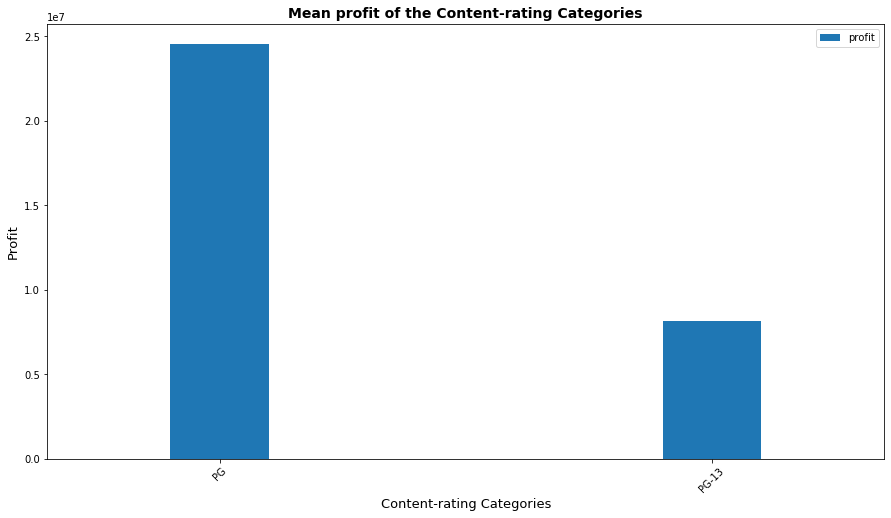

In [8]:
# Select the data that we want to conduct the genre analysis
DataMovies_selected2=DataMovies.loc[:,['country','title_year','gross','budget','content_rating','genres']]

# Find the mean profit for each movie. In order to calculate the profit we will subtract the mean budget
# from the mean gross. Finally we will add an extra column to our dataframe for the profit values.
calculate_profit = lambda row: row.gross - row.budget # define a function for the new column
col = DataMovies_selected2.apply(calculate_profit, axis=1) # get column data with an index
DataMovies_selected2 = DataMovies_selected2.assign(profit=col.values) # assign values to column 'c'

# Delete the rows which include missing values
DataMovies_selected2 = DataMovies_selected2.dropna()
DataMovies_selected2 = DataMovies_selected2.reset_index(drop=True)


# Select the appropriate data (budget <= 5m, country = USA, title year >= 2000)
target_budget = 5000000
DataMovies_selected_N2 = DataMovies_selected2[(DataMovies_selected['title_year']>=2000) & (DataMovies_selected['budget']<=target_budget) & (DataMovies_selected['country']=='USA')]
DataMovies_selected_N2 = DataMovies_selected_N2.reset_index(drop=True)

# Select the specific data for the content rating analysis
content_analysis_data = DataMovies_selected_N2.loc[:,['content_rating','genres','profit']]
content_rating = content_analysis_data.reset_index(drop=True)


# Find the mean profit of each category
content_rating_final = content_rating.groupby('content_rating', as_index=False)['profit'].mean()


# Add a column that counts how many movie there are at each category
content_rating_final['counts'] = content_rating_final['content_rating'].map(content_rating["content_rating"].value_counts())


# Select the content rating categories that has at least 20 movies
content_rating_final = content_rating_final[(content_rating_final['counts']>=20) & (content_rating_final['profit']>0)]


# Sort the categories according to their mean profit 
content_rating_final = content_rating_final.sort_values(by='profit',ascending=False)


#Plot the mean profit of the content rating categories  
content_rating_final.plot(kind='bar',x='content_rating',y='profit',figsize=(15,8),rot= 45,width=0.2)
plt.title('Mean profit of the Content-rating Categories', fontsize=14,fontweight='bold')
plt.xlabel('Content-rating Categories',fontsize=13)
plt.ylabel('Profit',fontsize=13)
plt.show()



<br>
<br>
Looking at the Mean profit / Content rating diagram we see that the most profitable content-rating categories within a budget of 5 million in USA after 2000 are the PG and the PG - 13. PG seemed  to have a higher mean profit than the PG - 13 however we decided to do a hypothesis testing in order to find out whether PG mean budget is significally higher than the PG - 13 budget. 
<br>
<br>

###### Hypothesis Testing for Difference between the PG mean profit and the PG-13 mean profit:
<br>
- Null Hypothesis H0: The PG mean profit (μ1)  is equal to PG-13 mean profit (μ2) → μ1 - μ2 = 0
<br>
<br>
- Alternative Hypothesis H1: The PG mean profit (μ1) is significant higher than the PG-13 mean profit → μ1 - μ2 > 0
<br>
<br>
- Significance Level α: 0.05
<br>
<br>

In this case, we would assume that the Null Hypothesis is True and we will conduct a t-test to compute the p-value for the difference between the two mean profits. The last step would be to compare the the p-value with our significance value  α and if p<a to reject the null hypothesis and take the alternative one.
<br>
<br>



#### Hypothesis Testing for Difference between means (Content - rating analysis)

In [9]:
content_means=content_rating.groupby('content_rating')['profit'].mean() 
content_std=content_rating.groupby('content_rating')['profit'].std()
content_count=content_rating.groupby('content_rating')['profit'].count()

combinederror=(((content_std['PG']**2)/content_count['PG'])+((content_std['PG-13']**2)/content_count['PG-13']))**0.5   
z=(content_means['PG']-content_means['PG-13'])/combinederror

p_value_from_normal_for_diff = (1-stats.norm.cdf(z))
print ('one_tail PG-PG-13 mean profit difference: ', p_value_from_normal_for_diff)

one_tail PG-PG-13 mean profit difference:  0.09806881457358241


<br>
According to the result of our hypothesis test p > α. Consequently there is not evidence for PG film profits being significantly larger than PG-13 film profits. So in order to find out which one we will propose to our investors we will combine our results from the Genre analysis and we will find out whether Horror and Mystery films are classified more as PG or PG-13. 
<br>
<br>
In order to do this we constructed dataframe holding the information about Mystery and Horror movies that they are classified either as PG or PG-13 and we will calculate their percentages.
<br>
<br>


##### Code for Mystery / Horror PG vs PG-13 Analysis

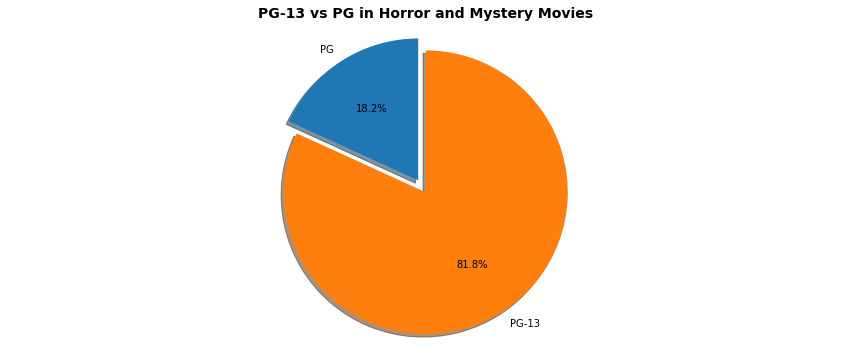

In [10]:
def explode(dataframe,column):
    
    """Explodes (unnests) a column of a dataframe.

    Parameters
    ----------
    dataframe : a pandas dataframe object
    
    column : the corresponding column of the dataframe
    
    Returns
    -------
    
    The unnested dataframe
    

    """
    
    d = []
    for i in range(0,len(dataframe[column])):
      
        x = dataframe[column][i].split('|') 
        for s in x:
            d.append({'movie_id':i, column:s, "content_rating":dataframe['content_rating'][i], "profit":dataframe['profit'][i]})

    return pd.DataFrame(d)


content_analysis_data_exploded = explode(content_analysis_data,'genres')


# Select the data for the Horror and the Mystery Films
horror_mystery_data = content_analysis_data_exploded[(content_analysis_data_exploded['genres']=='Horror') | (content_analysis_data_exploded['genres']=='Mystery')]


# Select the data for the Horror and the Mystery Films that they are classified either as PG or PG-13
horror_mystery_data_PG_PG_13 = horror_mystery_data[(horror_mystery_data['content_rating']=='PG')  | (horror_mystery_data['content_rating']=='PG-13') ]

#horror_mystery_data_PG_PG_13
horror_mystery_data_PG = horror_mystery_data_PG_PG_13[horror_mystery_data_PG_PG_13['content_rating']=='PG']['content_rating'].count()
horror_mystery_data_PG13 = horror_mystery_data_PG_PG_13[horror_mystery_data_PG_PG_13['content_rating']=='PG-13']['content_rating'].count()

# Calculate the percantage of PG and PG-13 content rating category within  movies
PG_percantage = horror_mystery_data_PG / (horror_mystery_data_PG + horror_mystery_data_PG13)  * 100
PG_13_percantage = 100 - PG_percantage


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'PG', 'PG-13'
sizes = [PG_percantage, PG_13_percantage]
explode = (0.1, 0.0) 

fig1, ax1 = plt.subplots()
fig1.set_size_inches(15, 6)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('PG-13 vs PG in Horror and Mystery Movies', fontsize=14,fontweight='bold')
plt.show()


<br>
Looking at the pie chart above we can clearly observe that the majority of the Horror and Mystery films are PG-13. Taking into account that PG-13 is the second most profitable content-rating category with no significant difference from the PG as well as the fact that the two most profitable genres (Horror and Mystery) are largely classified as PG-13, we reach the conclusion that the best option regarding the content rating category is PG-13.
<br>
<br>
<br>

### 4. Results / Conclusion

<br>
<br>
Reaching at the end of our analysis we are confident that we have concluded to some really useful proposals for our investors. The main focus of our analysis was about the country, the genre and the content rating of the movies. Setting up some conditions such as the target budget of the movies as well as some evaluation and validation methods (Hypothesis Testing) we managed to come up with some really interesting results. To sum up we found out:
<br>
<br>
- Country Analysis: The analysis was focused on the movies that have been produced in USA as the majority of the movies in the dataset were in USA (79%). Furthemore this decsion helped us to overcome the issue with the inconsistent currencies  as all  movies in USA were in USD. For this reason we believe that we should produce our movie in USA.
<br>
<br>
- Genre Analysis: The most profitable genres within our specified target budget (budget <= 5 Million) were the Horror and the Mystery. Specifically, we found out that they guarantee a profit > budget.
<br>
<br>
- Content Rating: Regarding the content rating we found out that the most profitable content rating categories among the low-budget films (<= 5 million) as ours, were the PG and PG-13. Conducting a Hypothesis test we examined the difference of their means profits and we found out that it wasn't significant. So, taking into account the fact that Horror and Mystery are classified more as PG-13 than PG we decided that the content rating of the movie should be PG-13.
<br>
<br>
<br>


### 6. References

 - [1] https://www.kdnuggets.com/2016/03/data-science-process.html
 <br>
 <br>
 - [2] https://www.investopedia.com/terms/t/t-test.asp
 <br>
 <br>
 - [3] http://mathworld.wolfram.com/HypothesisTesting.html
 <br>
 <br>
 - [4] https://stattrek.com/probability-distributions/t-distribution.aspx
 <br>
 <br>
 - [5] http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_4.html